In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("flightData_0_deg.csv")
data = data.iloc[::2].reset_index()
Alt = data["Altitude"]
Acc_Z = data["AccX"]
Time = data["Time"].div(1000)

# import raw data to calculate sensor covariance from
raw_data = pd.read_csv("flightData_0_deg_raw.csv")
cov_mat = raw_data.iloc[200:1200][["Altitude", "AccX"]].cov()
print(cov_mat)

          Altitude      AccX
Altitude  0.092852 -0.055174
AccX     -0.055174  0.460889


In [2]:
def diff(X, T):
    V = []
    for i in range(1, len(X)):
        V.append((X[i]-X[i-1])/(T[i]-T[i-1]))
    return V

def integrate(X, T):
    V = [0]
    for i in range(1, len(X)):
        V.append(V[-1] + 0.5*(T[i]-T[i-1])*(X[i-1] + X[i]))
    return V

V_Baro = diff(Alt.tolist(), Time.tolist())
V_Acc = integrate(Acc_Z.tolist(), Time.tolist())


In [3]:
# Kalman Filter
def getF(delta_T):
    return np.array([[1, delta_T, 0.5*delta_T**2], [0, 1, delta_T], [0, 0, 1]])

Alt_pred = []
Vel_pred = []
Acc_pred = []

C = np.array([[1, 0, 0], [0, 0, 1]])
# State Vector
Xk = np.array([[0], [0], [0]])
# State Estimate Covariance
Pk = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
# Sensor Covariance
#R = np.array([[0.0929, 0], [0, 0.4609]])
R = np.array([[0.001, 0], [0, 0.1]])
# Model Covariance
Q = np.array([[0.000001, 0, 0], [0, 0, 0], [0, 0, 0.1]])
for i in range(1, len(Time)):
    delta_T = Time[i] - Time[i-1]
    Y = np.array([[Alt[i]], [Acc_Z[i]]])
    F = getF(delta_T)
    Xkp_min = F.dot(Xk)
    Ykp_min = C.dot(Xkp_min)
    Pkp_min = F.dot(Pk).dot(np.transpose(F)) + Q
    K = Pkp_min.dot(np.transpose(C)).dot(np.linalg.inv(C.dot(Pkp_min).dot(np.transpose(C)) + R))
    Xk = Xkp_min + K.dot(Y - Ykp_min)
    Pk = (np.eye(3) - K.dot(C)).dot(Pkp_min)
    
    print(str(Xk[0][0])+','+str(Xk[1][0])+','+str(Xk[2][0]))
    
    Alt_pred.append(Xk[0][0])
    Vel_pred.append(Xk[1][0])
    Acc_pred.append(Xk[2][0])

    print("" + str(Xk[0][0]) + "," + str(Xk[1][0])+ "," + str(Xk[2][0]))



0.0020879120879120877,0.0,-0.04
0.0020879120879120877,0.0,-0.04
0.006879460270974452,0.017183954326855516,0.06739971454279209
0.006879460270974452,0.017183954326855516,0.06739971454279209
0.023566408911644188,0.12854478311243442,0.26069030695392736
0.023566408911644188,0.12854478311243442,0.26069030695392736
0.07540300034244049,0.4020603459737223,0.4186258946593241
0.07540300034244049,0.4020603459737223,0.4186258946593241
0.20576266378771135,0.923438800483738,0.5213722695989483
0.20576266378771135,0.923438800483738,0.5213722695989483
0.4353370754483288,1.6172152156514106,0.5092087646513174
0.4353370754483288,1.6172152156514106,0.5092087646513174
0.763713919395535,2.3634778185997476,0.43477895571743075
0.763713919395535,2.3634778185997476,0.43477895571743075
1.1540056136025596,3.0052592520493513,0.3214351238184776
1.1540056136025596,3.0052592520493513,0.3214351238184776
1.569722272324741,3.3970527508347574,0.20109554672784175
1.569722272324741,3.3970527508347574,0.20109554672784175
1.89

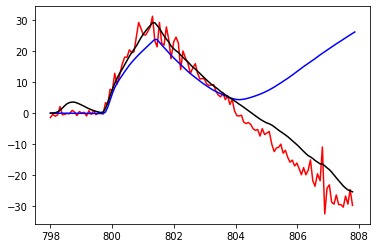

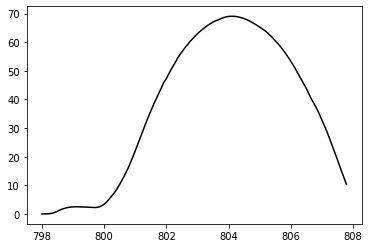

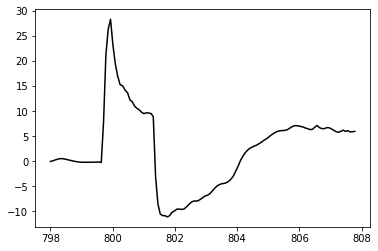

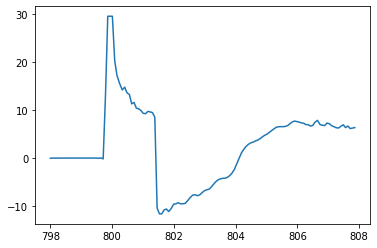

In [4]:
#plt.plot(Time, Alt)
#plt.show()
plt.plot(Time[:-1], V_Baro, 'r')
plt.plot(Time, V_Acc, 'b')
plt.plot(Time[:-1], Vel_pred, 'k')
plt.show()
plt.plot(Time[:-1], Alt_pred, 'k')
plt.show()
plt.plot(Time[:-1], Acc_pred, 'k')
plt.show()
plt.plot(Time, Acc_Z)
plt.show()